In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
df = pd.read_csv("Data/spam.csv", encoding="ISO-8859-1", engine="python")


In [102]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [104]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3",
        "Unnamed: 4"], inplace=True, axis=0)


In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [106]:
df.rename(columns={"v1": "Category", "v2": "Text"}, inplace=True)


In [107]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [108]:
from sklearn.preprocessing import LabelEncoder


In [109]:
encoder = LabelEncoder()


In [110]:
df["Category"] = encoder.fit_transform(df["Category"])


In [111]:
df.head()


,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df.isnull().sum()


Category    0
Text        0
dtype: int64

In [113]:
df.duplicated().sum()


403

In [114]:
df = df.drop_duplicates(keep="first")


In [115]:
df.duplicated().sum()


0

In [116]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   int32 
 1   Text      5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [117]:
df["Category"].value_counts()


0    4516
1     653
Name: Category, dtype: int64

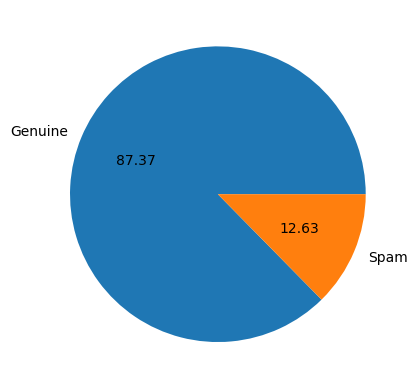

In [118]:
plt.pie(df["Category"].value_counts(), labels=[
        "Genuine", "Spam"], autopct="%0.2f")

plt.show()


In [119]:
import nltk


In [120]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
df["num_char"] = df["Text"].apply(len)


In [122]:
df["num_word"] = df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [123]:
df["num_sentence"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))


In [124]:
df.head()


,Category,Text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [125]:
df[["num_char", "num_word", "num_sentence"]].describe()


,num_char,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [126]:
# Genuine

df[df["Category"] == 0][["num_char", "num_word", "num_sentence"]].describe()


,num_char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [127]:
# Spam

df[df["Category"] == 1][["num_char", "num_word", "num_sentence"]].describe()


,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


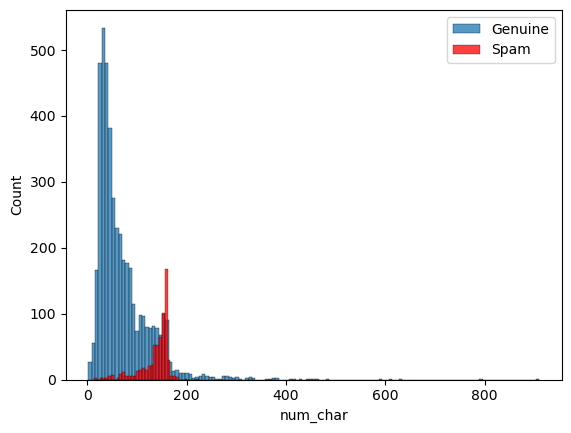

In [128]:
plt.figure(dpi=100)
sns.histplot(df[df["Category"] == 0]["num_char"], label="Genuine")
sns.histplot(df[df["Category"] == 1]["num_char"], label="Spam", color="red")
plt.legend()


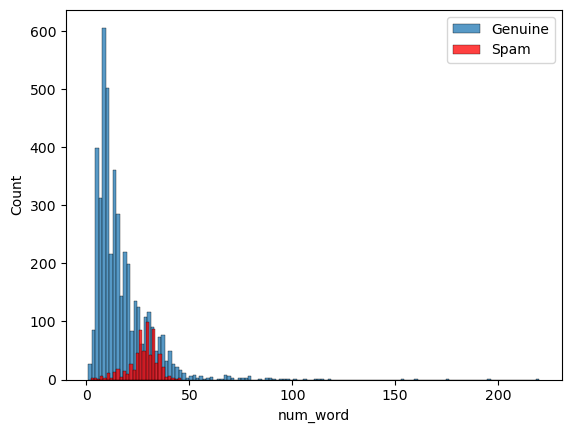

In [129]:
plt.figure(dpi=100)
sns.histplot(df[df["Category"] == 0]["num_word"], label="Genuine")
sns.histplot(df[df["Category"] == 1]["num_word"], label="Spam", color="red")
plt.legend()


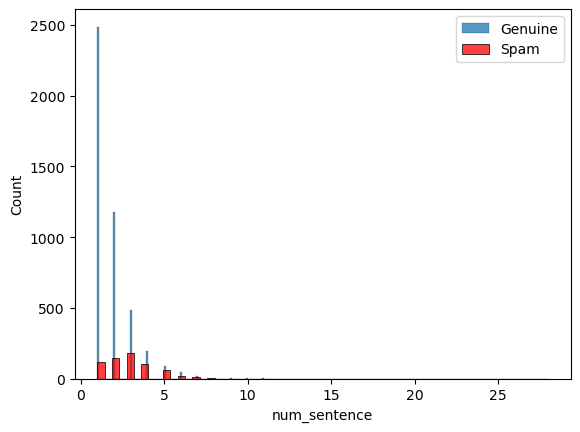

In [130]:
plt.figure(dpi=100)
sns.histplot(df[df["Category"] == 0]["num_sentence"], label="Genuine")
sns.histplot(df[df["Category"] == 1]["num_sentence"],
             label="Spam", color="red")
plt.legend()


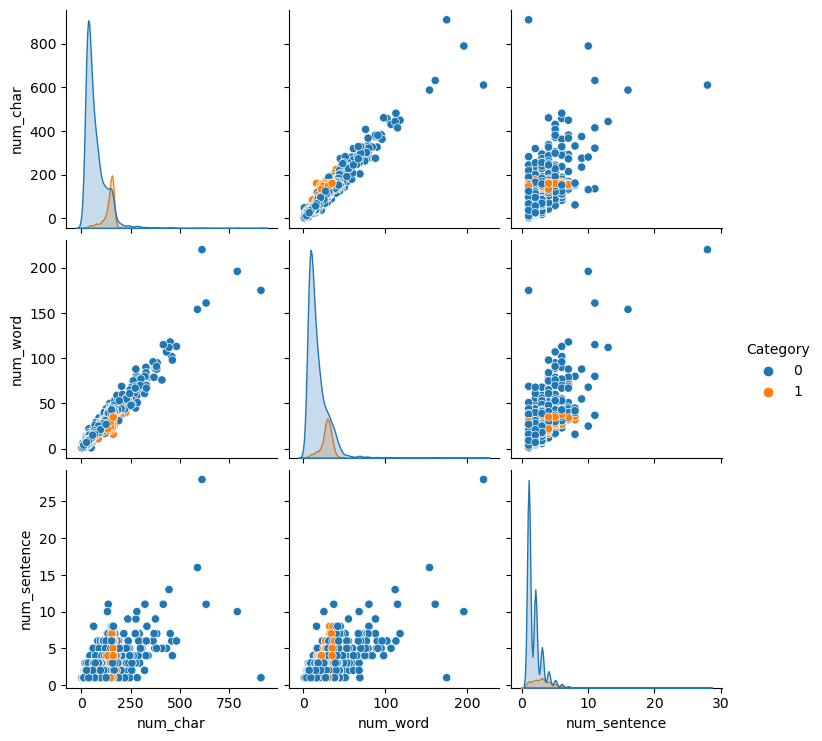

In [131]:
sns.pairplot(data=df, hue="Category")


<AxesSubplot:>

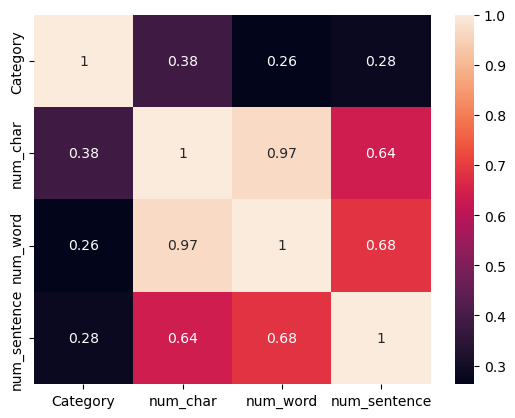

In [132]:
sns.heatmap(data=df.corr(), annot=True)


In [133]:
from nltk.corpus import stopwords
import string


In [134]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\habib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
from nltk.stem.porter import PorterStemmer


In [136]:
ps = PorterStemmer()


In [137]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [138]:

df["transform_text"] = df["Text"].apply(transform_text)


In [139]:
df["transform_text"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transform_text, Length: 5169, dtype: object

In [140]:
df.head()


,Category,Text,num_char,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
from wordcloud import WordCloud


In [142]:
wc = WordCloud(width=500, height=500, min_font_size=10,
               background_color="white")


In [143]:
spam_wc = wc.generate(df[df["Category"] == 1]
                      ["transform_text"].str.cat(sep=" "))


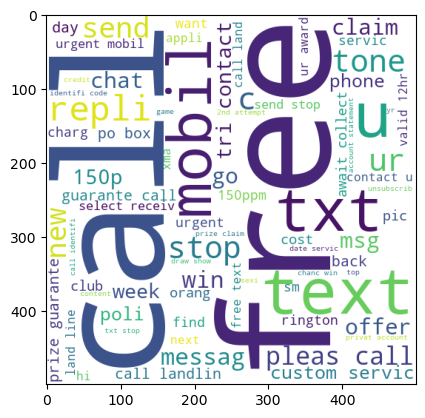

In [144]:
plt.imshow(spam_wc)


In [145]:
genuine_wc = wc.generate(df[df["Category"] == 0]
                         ["transform_text"].str.cat(sep=" "))


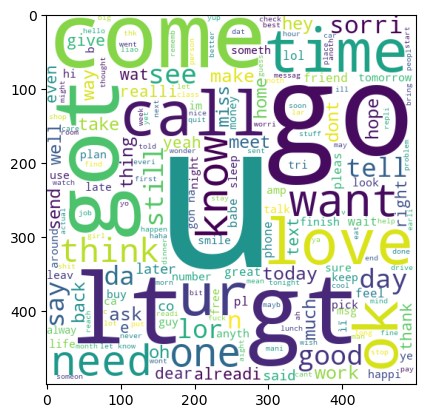

In [146]:
plt.imshow(genuine_wc)


In [147]:
spam_corpus = []

for msg in df[df["Category"] == 1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [148]:
genuine_corpus = []

for msg in df[df["Category"] == 0]["transform_text"].tolist():
    for word in msg.split():
        genuine_corpus.append(word)


In [149]:
from collections import Counter


c:\Users\habib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


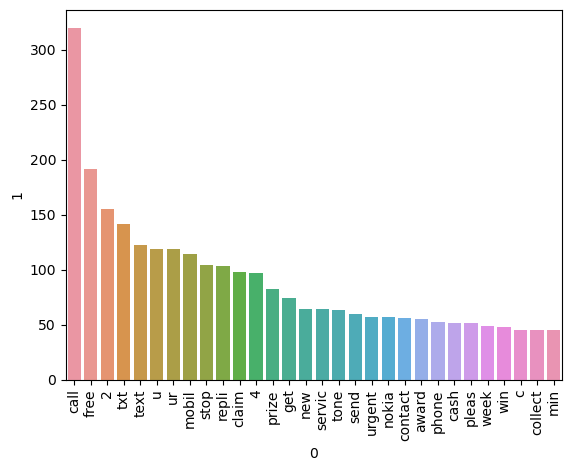

In [150]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[
            0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()


c:\Users\habib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


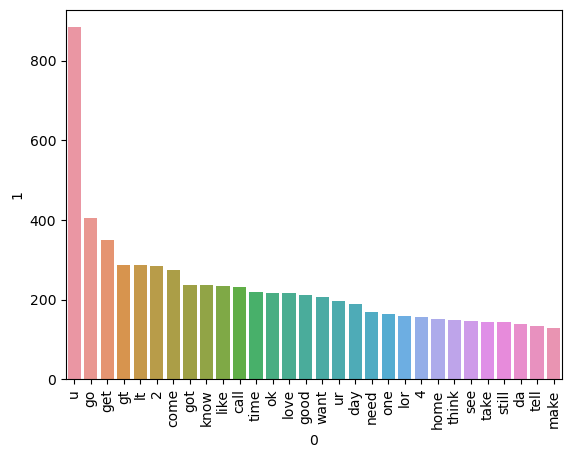

In [151]:
sns.barplot(pd.DataFrame(Counter(genuine_corpus).most_common(30))[
            0], pd.DataFrame(Counter(genuine_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()


In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [153]:
tv = TfidfVectorizer(max_features=3000)


In [154]:
X = tv.fit_transform(df["transform_text"]).toarray()


In [155]:
y = df["Category"].values


In [156]:
from sklearn.model_selection import train_test_split


In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22)


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from xgboost import XGBClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [ ]:
clfs = {
    'SVC': svc,
    'KN': knc,
    "GNB": gnb,
    "BNB": bnb,
    'MNB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test)

    print(f"For {name}")
    print(f"Accuracy - {current_accuracy} ")
    print(f"Precision - {current_precision}")
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9777562862669246 
Precision - 0.9722222222222222



c:\Users\habib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For KN
Accuracy - 0.9148936170212766 
Precision - 1.0

For GNB
Accuracy - 0.8568665377176016 
Precision - 0.45064377682403434

For BNB
Accuracy - 0.9825918762088974 
Precision - 0.9734513274336283

For MNB
Accuracy - 0.9796905222437138 
Precision - 1.0

For DT
Accuracy - 0.9458413926499033 
Precision - 0.8876404494382022

For LR
Accuracy - 0.9593810444874274 
Precision - 0.9368421052631579

For RF
Accuracy - 0.971953578336557 
Precision - 0.9897959183673469

For AdaBoost
Accuracy - 0.9690522243713733 
Precision - 0.9603960396039604

For BgC
Accuracy - 0.9690522243713733 
Precision - 0.9428571428571428

For ETC
Accuracy - 0.97678916827853 
Precision - 0.9902912621359223

For GBDT
Accuracy - 0.9555125725338491 
Precision - 0.9647058823529412

For xgb
Accuracy - 0.9709864603481625 
Precision - 0.9523809523809523



In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [ ]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
4,MNB,0.979691,1.000000
10,ETC,0.976789,0.990291
7,RF,0.971954,0.989796
3,BNB,0.982592,0.973451
0,SVC,0.977756,0.972222
11,GBDT,0.955513,0.964706
8,AdaBoost,0.969052,0.960396
12,xgb,0.970986,0.952381
9,BgC,0.969052,0.942857


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")


In [ ]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.914894
1,MNB,Accuracy,0.979691
2,ETC,Accuracy,0.976789
3,RF,Accuracy,0.971954
4,BNB,Accuracy,0.982592
5,SVC,Accuracy,0.977756
6,GBDT,Accuracy,0.955513
7,AdaBoost,Accuracy,0.969052
8,xgb,Accuracy,0.970986
9,BgC,Accuracy,0.969052


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores,
                              'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [ ]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
4,MNB,0.979691,1.000000
10,ETC,0.976789,0.990291
7,RF,0.971954,0.989796
3,BNB,0.982592,0.973451
0,SVC,0.977756,0.972222
11,GBDT,0.955513,0.964706
8,AdaBoost,0.969052,0.960396
12,xgb,0.970986,0.952381
9,BgC,0.969052,0.942857


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")


In [ ]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.914894
1,MNB,Accuracy,0.979691
2,ETC,Accuracy,0.976789
3,RF,Accuracy,0.971954
4,BNB,Accuracy,0.982592
5,SVC,Accuracy,0.977756
6,GBDT,Accuracy,0.955513
7,AdaBoost,Accuracy,0.969052
8,xgb,Accuracy,0.970986
9,BgC,Accuracy,0.969052


In [ ]:
import pickle


In [ ]:
pickle.dump(tv, open("vector.pk", "wb"))


In [ ]:
pickle.dump(mnb, open("model.pk", "wb"))
